# Penerapan Algoritma Agglomerative Hierarchical Clustering pada Pengelompokkan Data Kasus Kematian Covid-19 di China


In [ ]:
# IMPORT LIBRARY
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
# LOAD DATASET
url = 'https://drive.google.com/file/d/106KFxEkD6vCAhjQCExN96vyN4nJPdn8R/view?usp=sharing' #link google drive dataset
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
dataset = pd.read_csv(path)
dataset.head()

,Date,Total_Cases,Total_Death
0,17 Jan 23,4863690,18242
1,16 Jan 23,4859037,18192
2,15 Jan 23,4852776,18126
3,14 Jan 23,4845027,18072
4,13 Jan 23,4836633,17978


# OLAH DATA

In [ ]:
# PILIH KOLOM
X=dataset[['Total_Death', 'Total_Cases']]
X

,Total_Death,Total_Cases
0,18242,4863690
1,18192,4859037
2,18126,4852776
3,18072,4845027
4,17978,4836633
...,...,...
1085,56,2075
1086,42,1406
1087,26,920
1088,18,643


In [ ]:
# CEK TIPE DATA
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Total_Death  1090 non-null   int64
 1   Total_Cases  1090 non-null   int64
dtypes: int64(2)
memory usage: 17.2 KB


In [ ]:
# CEK DATA NULL
X.isnull().sum()

Total_Death    0
Total_Cases    0
dtype: int64

In [ ]:
# LIHAT UKURAN DATASET
X.shape

(1090, 2)

In [ ]:
# LIHAT RINGKASAN DATASET
X.describe()

,Total_Death,Total_Cases
count,1090.000000,1.090000e+03
mean,7494.175229,8.299849e+05
std,4802.535174,1.246606e+06
min,17.000000,5.480000e+02
25%,4739.000000,9.102750e+04
50%,4848.000000,1.043585e+05
75%,13826.500000,1.854184e+06
max,18242.000000,4.863690e+06


# MEMBUAT DENDOGRAM DAN MENCARI JUMLAH CLUSTER

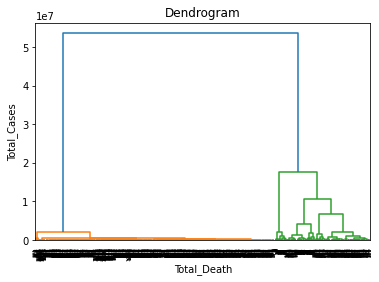

In [ ]:
# MEMBUAT DENDONGRAM
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Total_Death")
plt.ylabel("Total_Cases")
plt.show()

In [ ]:
# MENGGUNAKAN CLUSTER 2
ac = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
ac.fit(X)

AgglomerativeClustering()

# PROSES CLUSTERING

In [ ]:
# LIHAT HASIL CLUSTERING
ac.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# LIHAT DATA YANG DI-CLUSTER
hasil_ac = X.copy()
hasil_ac["cluster"] = ac.labels_
hasil_ac.head()

,Total_Death,Total_Cases,cluster
0,18242,4863690,0
1,18192,4859037,0
2,18126,4852776,0
3,18072,4845027,0
4,17978,4836633,0


# VISUALISASI HASIL CLUSTERING

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frekuensi')

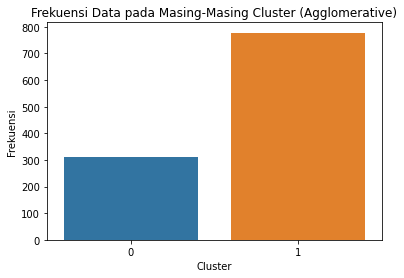

In [ ]:
# NILAI SUMBU X DAN Y
cluster_x1 = hasil_ac["cluster"].value_counts().index
cluster_y1 = hasil_ac["cluster"].value_counts().values
# VISUALISASI
sns.barplot(cluster_x1, cluster_y1)
plt.title("Frekuensi Data pada Masing-Masing Cluster (Agglomerative)")
plt.xlabel("Cluster")
plt.ylabel("Frekuensi")

In [ ]:
# NILAI VARIABEL DARI MASING-MASING VARIABEL
ann_ac0 = hasil_ac[hasil_ac["cluster"] == 0].iloc[:, 0]
spend_ac0 = hasil_ac[hasil_ac["cluster"] == 0].iloc[:, 1]
ann_ac1 = hasil_ac[hasil_ac["cluster"] == 1].iloc[:, 0]
spend_ac1 = hasil_ac[hasil_ac["cluster"] == 1].iloc[:, 1]

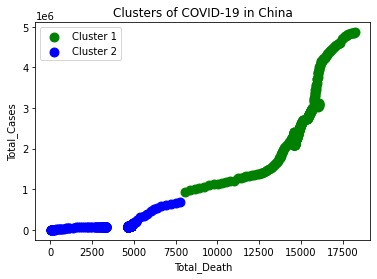

In [ ]:
# VISUALISASI HASIL CLUSTERING (AGGLOMERATIVE)
plt.scatter(ann_ac0, spend_ac0, s = 80, c = "green", label = "Cluster 1")
plt.scatter(ann_ac1, spend_ac1, s = 80, c = "blue", label = "Cluster 2")
plt.title("Clusters of COVID-19 in China")
plt.xlabel("Total_Death")
plt.ylabel("Total_Cases")
plt.legend()
plt.show()

# CLUSTERING EVALUATION

In [ ]:
# MENGGUNAKAN SILHOUETTE SCORE
sil_agglo = silhouette_score(X, ac.labels_)
print('Silhouette Score Agglomerative Hierarchical Score : ', sil_agglo)

Silhouette Score Agglomerative Hierarchical Score :  0.8716999124856851


In [ ]:
# MENGGUNAKAN DBI SCORE
dbi_agglo = davies_bouldin_score(X, ac.labels_)
print('DBI Score Agglomerative Hierarchical Score : ', dbi_agglo)

DBI Score Agglomerative Hierarchical Score :  0.2784851042218971
